Student: Pham Thu Thao <br>
Student ID: 1F10190004

### Dataset source:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. <br>
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS. <br>

  Available at: <br> 
  [pdf] http://hdl.handle.net/1822/14838 <br>
  [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

### Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

### Load data:

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";", header=0)
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Check number of data and variables
print(df.shape)

(45211, 17)


In [4]:
# Check null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
print(df.isnull().any())

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


No null values are noticed, therefore there's no need to fill in or exclude rows with null values.

### Preprocessing data:

#### Explanatory and response variables:

In [6]:
X = df.loc[:, df.columns!="y"]
y = df["y"]
display(X.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


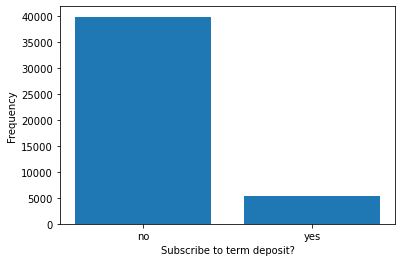

In [7]:
y_values = y.value_counts()
plt.bar(y_values.index, y_values)
plt.xlabel("Subscribe to term deposit?")
plt.ylabel("Frequency")
plt.show()

#### Deal with categorical variables:

In [8]:
X_dummy = pd.get_dummies(X, drop_first=True)
display(X_dummy.head())

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
y_dummy = np.array(pd.get_dummies(y, drop_first=True)).reshape(len(y,))
print(y_dummy)

[0 0 0 ... 1 0 0]


#### Split train and test dataset:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=120)

### Naive Bayes Classifier:

#### Create and fit model:

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### Check accuracy on test set:

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy on test set:", metrics.accuracy_score(y_pred, y_test))

Accuracy on test set: 0.8601127944266284


In [14]:
print("Recall score:", metrics.recall_score(y_pred, y_test))

Recall score: 0.41185897435897434


In [15]:
print("F1 score:", metrics.f1_score(y_pred, y_test))

F1 score: 0.44832097688617534


In [16]:
print(metrics.confusion_matrix(y_test, y_pred))

[[7264  734]
 [ 531  514]]


### Logistic regression:

#### Create and fit model:

In [17]:
model = LogisticRegression(solver='liblinear', max_iter=100, class_weight = 'balanced')
# Setting balanced class weight to reduce effects of imbalanced classes
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

#### Check accuracy on test set:

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy on test set:", metrics.accuracy_score(y_pred, y_test))

Accuracy on test set: 0.8486121862213867


In [20]:
print("Recall score:", metrics.recall_score(y_pred, y_test)) 
# recall score: correct positive predictions made out of all positive predictions

Recall score: 0.42143549951503395


In [21]:
print("F1 score:", metrics.f1_score(y_pred, y_test))

F1 score: 0.5593820405535888


In [22]:
print(metrics.confusion_matrix(y_test, y_pred))

[[6805 1193]
 [ 176  869]]


Note: <br>
> By setting class_weight to 'balanced', the logistic regression works better than Naive Bayes Classifier on finding positive samples (clients who subscribe to a term deposit) but classifies negative samples worse.

> In reality, by having a formula containing average profit made by a new term deposit subscription and cost incurred by marketing efforts, we may pick out the best model and the best parameters (for example, 'class_weight' of Logistic Regression) in terms of earned profits through examining the confusion matrix.

### Evaluation using profit formula:

Assume that: <br>
- Average profit earned by a term deposit: $1000 

- Average cost inccured by a marketing effort: $2 <br>

Formula: Profit = 1000\*x1 - 2\*x2 <br>
    with: <br>
        + x1: number of term deposits (true positive) <br>
        + x2: number of marketing efforts made (all predicted positive)

#### Naive Bayes Classifier

In [23]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
nb_cm = metrics.confusion_matrix(y_test, y_pred)
print(nb_cm)

[[7264  734]
 [ 531  514]]


In [24]:
nb_profit = nb_cm[1,1]*1000 - (nb_cm[1,1]+nb_cm[0,1])*2
print("Profit generated by using Naive Bayes Classifier model:", nb_profit)

Profit generated by using Naive Bayes Classifier model: 511504


#### Logistic Regression:

In [25]:
model = LogisticRegression(solver='liblinear', max_iter=100, class_weight = 'balanced')
# Setting balanced class weight to reduce effects of imbalanced classes
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
lr_cm = metrics.confusion_matrix(y_test, y_pred)
print(lr_cm)

[[6805 1193]
 [ 176  869]]


In [26]:
lr_profit = lr_cm[1,1]*1000 - (lr_cm[1,1]+lr_cm[0,1])*2
print("Profit generated by using Logistic Regression model:", lr_profit)

Profit generated by using Logistic Regression model: 864876


#### Comparison:

In [27]:
print(nb_profit>lr_profit)

False


Conclusion: Among two models created above, using the Logistic Regression model is expected to generate more profits than Naive Bayes Classifier model (excluding other costs such as cloud computing cost, etc.)

### Generate the best Naive Bayes Classifier and Logistic Regression model by variable selection:

#### Define backward variable selection function:

In [28]:
def step_mod_backward(model, X_train, y_train, X_test, y_test, **kwargs):
    
    exog = X_train.columns
    selected = set(exog)  # Selected exogenous variables
    
    mod = model(**kwargs)
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    profit = cm[1,1]*1000 - (cm[1,1]+cm[0,1])*2
    current_score, best_new_score = profit, profit

    while True:
        score_with_candidates = []
        for candidate in selected:
            trial = selected.copy()
            trial.remove(candidate)
            mod = model(**kwargs)
            mod.fit(X_train[trial], y_train)
            y_pred = mod.predict(X_test[trial])
            cm = metrics.confusion_matrix(y_test, y_pred)
            profit = cm[1,1]*1000 - (cm[1,1]+cm[0,1])*2

            score_with_candidates.append((profit, candidate))

        score_with_candidates.sort(reverse=False)
        best_score, best_candidate = score_with_candidates[0]

        improved = False
        if best_score > current_score:
            selected.remove(best_candidate)
            current_score = best_score
            improved = True
            
        if len(selected)==1 or not improved: break

    print('Chosen variables:', selected)
    mod = model(**kwargs)
    mod.fit(X_train[selected], y_train)
    y_pred = mod.predict(X_test[selected])
    cm = metrics.confusion_matrix(y_test, y_pred)
    profit = cm[1,1]*1000 - (cm[1,1]+cm[0,1])*2
    print('Profit generated: {}'.format(profit))
    return selected

#### Logistic Regression

In [29]:
exog1 = step_mod_backward(LogisticRegression, X_train, y_train, X_test, y_test, solver='liblinear', max_iter=100, class_weight = 'balanced')

Chosen variables: {'marital_married', 'job_unknown', 'month_jun', 'month_feb', 'housing_yes', 'loan_yes', 'month_nov', 'job_entrepreneur', 'campaign', 'job_retired', 'contact_unknown', 'job_technician', 'age', 'poutcome_success', 'month_may', 'pdays', 'previous', 'contact_telephone', 'month_jan', 'day', 'education_tertiary', 'month_mar', 'job_blue-collar', 'job_housemaid', 'month_sep', 'job_unemployed', 'education_unknown', 'job_management', 'month_oct', 'duration', 'marital_single', 'job_self-employed', 'default_yes', 'balance', 'month_dec', 'month_jul', 'poutcome_other', 'job_services', 'poutcome_unknown', 'education_secondary', 'month_aug', 'job_student'}
Profit generated: 861886


In [30]:
print(len(exog1))

42


#### Naive Bayes Classifier:

In [31]:
exog2 = step_mod_backward(GaussianNB, X_train, y_train, X_test, y_test)

Chosen variables: {'marital_married', 'job_unknown', 'month_jun', 'month_feb', 'housing_yes', 'loan_yes', 'month_nov', 'job_entrepreneur', 'campaign', 'job_retired', 'contact_unknown', 'job_technician', 'age', 'poutcome_success', 'month_may', 'pdays', 'previous', 'contact_telephone', 'month_jan', 'day', 'education_tertiary', 'month_mar', 'job_blue-collar', 'job_housemaid', 'month_sep', 'job_unemployed', 'education_unknown', 'job_management', 'month_oct', 'duration', 'marital_single', 'job_self-employed', 'default_yes', 'balance', 'month_dec', 'month_jul', 'poutcome_other', 'job_services', 'poutcome_unknown', 'education_secondary', 'month_aug', 'job_student'}
Profit generated: 511504


In [32]:
print(len(exog2))

42


#### Comparing with original selected variables:

In [33]:
print(X_train.shape[1]==len(exog1))
print(X_train.shape[1]==len(exog2))

True
True


Conclusion: no variables are excluded from the model.

### Conclusion:

1. With the profit formula defined as above, we adopt the model without exclusion of any variables.
2. Logistic Regression with its ability to adapt to the imbalance of response values, seems to work better with the datasets and profit formula we define - than Naive Bayes Classifier.
3. The Logistic Regression model works better in this case since we focus more on spotting positive response values (potential customer) rather than correctly classifying negative responses.
4. We may change the parameters in Logistic Regression for better results (for example, through trying different sets of class_weight).